# Time Plots

In [1]:
require(astsa)

Loading required package: astsa


The Dataset can be explored through this index.<br><br>
[Dataset-01: Jhonson & Jhonson](#1.-Johnson-and-Johnson-Quarterly-Earnings-Per-Share)<br>
[Dataset-02: Monthly Pneumonia and Influenza Deaths in the U.S.](#2.-Monthly-Pneumonia-and-Influenza-Deaths-in-the-U.S.)

## 1. Johnson and Johnson Quarterly Earnings Per Share

In [15]:
help(jj)

In [3]:
class(jj)

[1] "ts"

In [4]:
jj

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
1960,0.710000,0.630000,0.850000,0.440000
1961,0.610000,0.690000,0.920000,0.550000
1962,0.720000,0.770000,0.920000,0.600000
1963,0.830000,0.800000,1.000000,0.770000
1964,0.920000,1.000000,1.240000,1.000000
1965,1.160000,1.300000,1.450000,1.250000
1966,1.260000,1.380000,1.860000,1.560000
1967,1.530000,1.590000,1.830000,1.860000
1968,1.530000,2.070000,2.340000,2.250000
1969,2.160000,2.430000,2.700000,2.250000


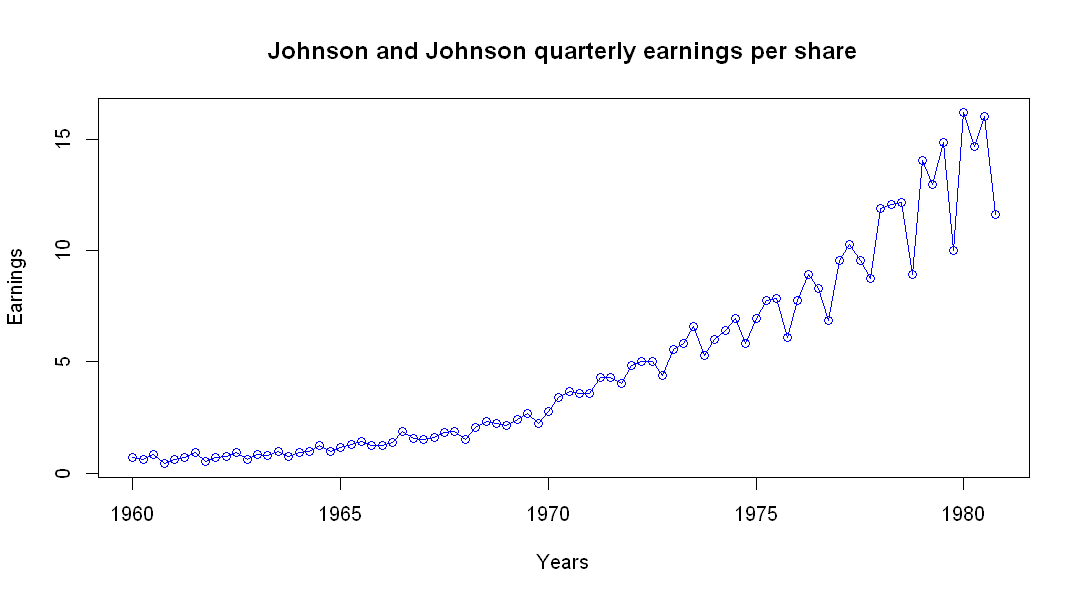

In [5]:
options(repr.plot.width=9, repr.plot.height=5)
plot(jj, type = "o", 
     col="blue", 
     main="Johnson and Johnson quarterly earnings per share",
     xlab="Years", 
     ylab="Earnings")

In [6]:
jj.linear.model <- lm(jj ~ time(jj))
jj.poly2.model <- lm(jj ~ poly(time(jj), 2, raw=TRUE))
jj.sinos.model <- lm(jj ~ poly(time(jj), 2, raw=TRUE)*sin(pi + 2*pi*(time(jj)-1959)))

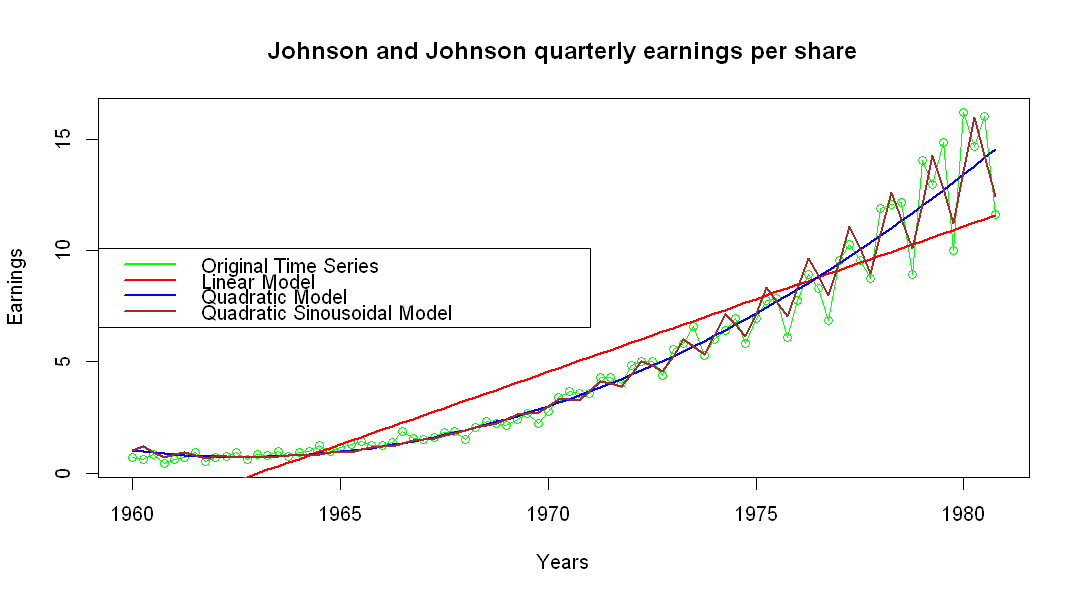

In [7]:
plot(jj, type = "o", 
     col="green", 
     main="Johnson and Johnson quarterly earnings per share",
     xlab="Years", 
     ylab="Earnings", lwd = 1.2)

lines(x = as.vector(time(jj)), y = predict(jj.linear.model), col = 'red', lwd = 1.7)
lines(x = as.vector(time(jj)), y = predict(jj.poly2.model), col = 'blue', lwd = 1.7)
lines(x = as.vector(time(jj)), y = predict(jj.sinos.model), col = 'brown', lwd = 1.7)

legend(x = "left", 
       y = "top", 
       legend=c("Original Time Series", "Linear Model", "Quadratic Model", "Quadratic Sinousoidal Model"), 
       col=c("green", "red", "blue", "brown"), 
       lwd=2, 
       text.font=0.2)

In [8]:
summary(jj.linear.model)


Call:
lm(formula = jj ~ time(jj))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1853 -1.1968 -0.5239  0.8742  5.1229 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.280e+03  5.926e+01  -21.61   <2e-16 ***
time(jj)     6.522e-01  3.007e-02   21.69   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.671 on 82 degrees of freedom
Multiple R-squared:  0.8515,	Adjusted R-squared:  0.8497 
F-statistic: 470.3 on 1 and 82 DF,  p-value: < 2.2e-16


In [9]:
summary(jj.poly2.model)


Call:
lm(formula = jj ~ poly(time(jj), 2, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-3.07418 -0.21177  0.08893  0.31063  2.77309 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.619e+05  1.187e+04   13.64   <2e-16 ***
poly(time(jj), 2, raw = TRUE)1 -1.650e+02  1.205e+01  -13.70   <2e-16 ***
poly(time(jj), 2, raw = TRUE)2  4.204e-02  3.057e-03   13.75   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9206 on 81 degrees of freedom
Multiple R-squared:  0.9555,	Adjusted R-squared:  0.9544 
F-statistic: 869.2 on 2 and 81 DF,  p-value: < 2.2e-16


In [10]:
summary(jj.sinos.model)


Call:
lm(formula = jj ~ poly(time(jj), 2, raw = TRUE) * sin(pi + 2 * 
    pi * (time(jj) - 1959)))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31505 -0.26595  0.01455  0.20174  2.67007 

Coefficients:
                                                                      Estimate
(Intercept)                                                          1.653e+05
poly(time(jj), 2, raw = TRUE)1                                      -1.685e+02
poly(time(jj), 2, raw = TRUE)2                                       4.291e-02
sin(pi + 2 * pi * (time(jj) - 1959))                                -3.737e+04
poly(time(jj), 2, raw = TRUE)1:sin(pi + 2 * pi * (time(jj) - 1959))  3.803e+01
poly(time(jj), 2, raw = TRUE)2:sin(pi + 2 * pi * (time(jj) - 1959)) -9.675e-03
                                                                    Std. Error
(Intercept)                                                          8.846e+03
poly(time(jj), 2, raw = TRUE)1                                       8

We can clearly see that the the Adjusted R square is the highest in case of Quadratic Sinousoidal signal.

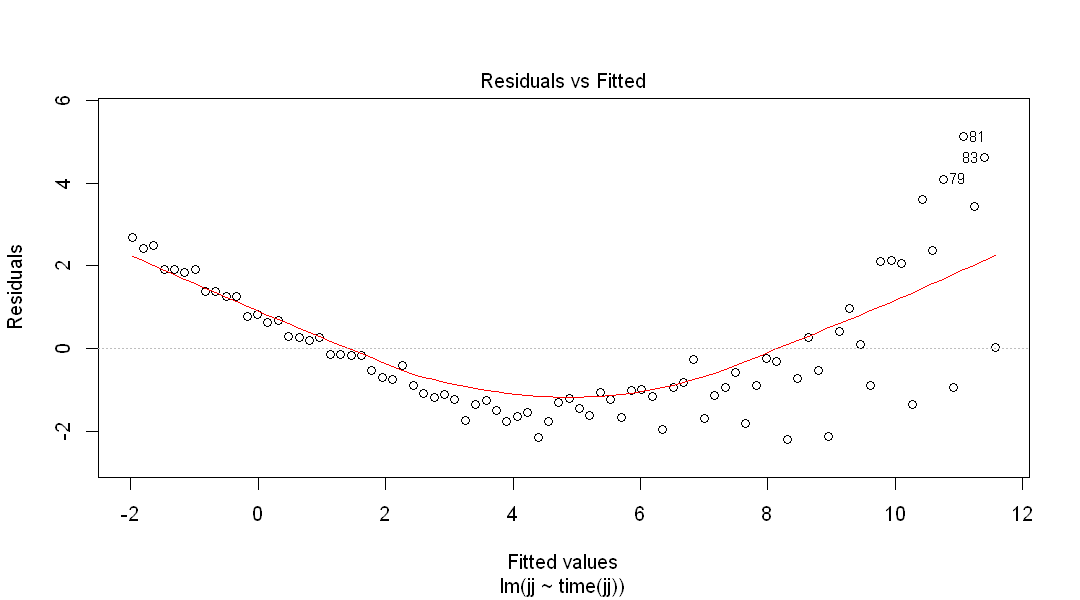

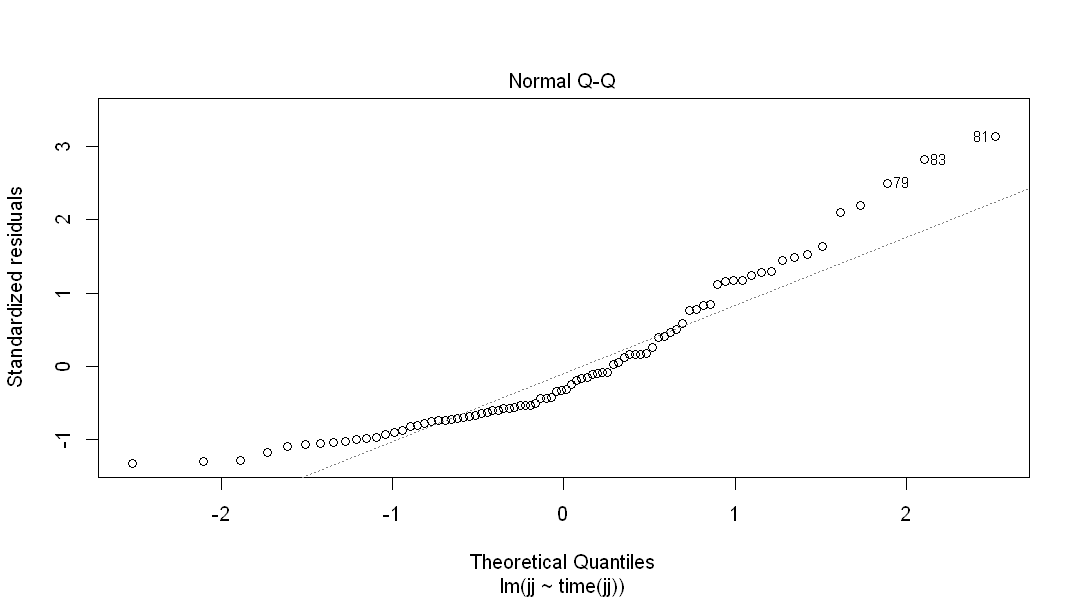

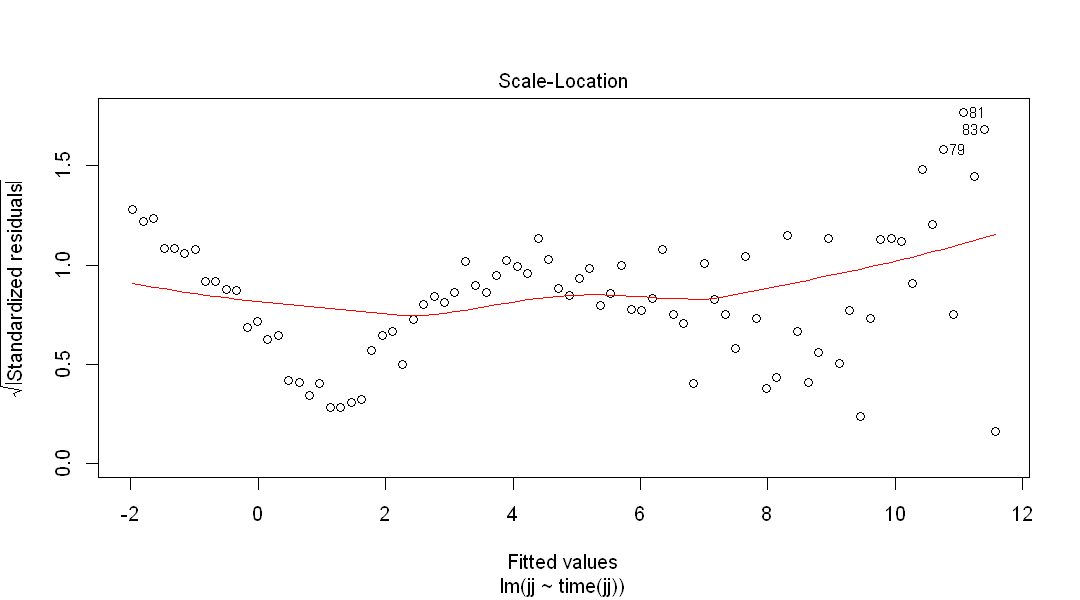

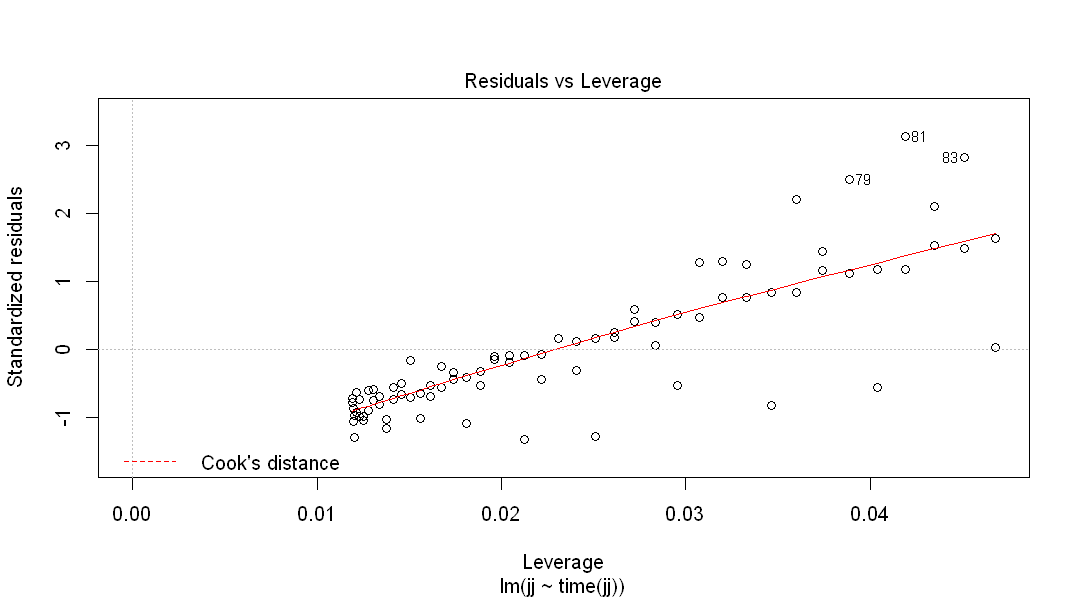

In [11]:
plot(jj.linear.model)

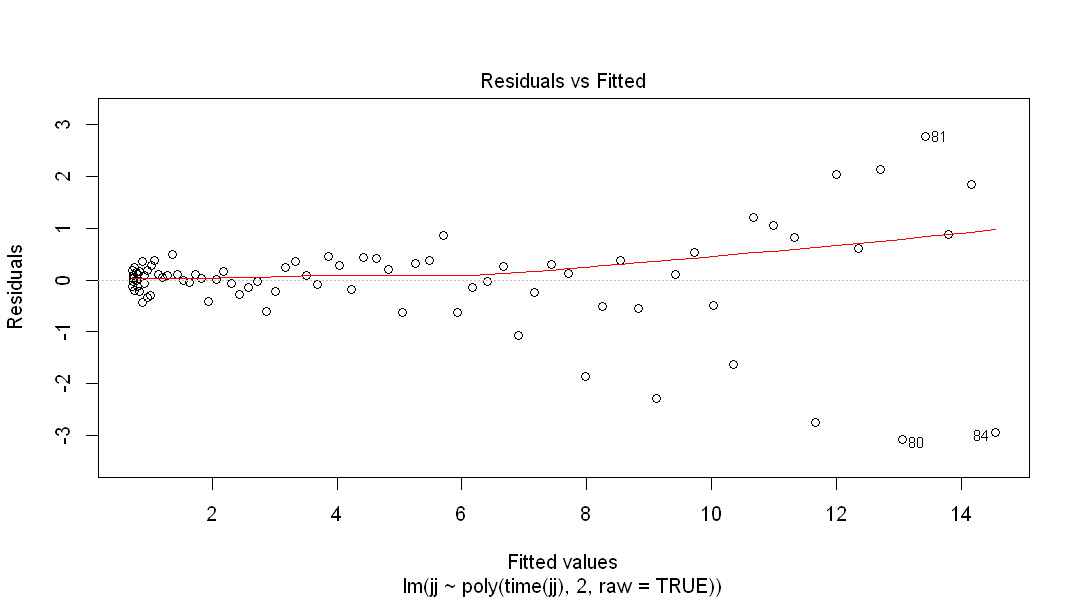

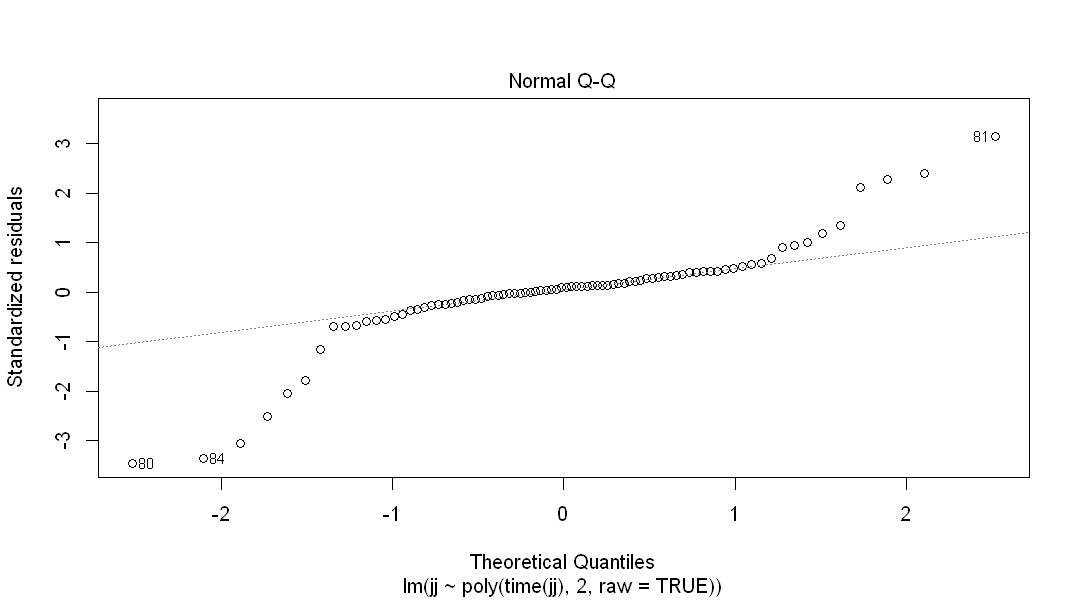

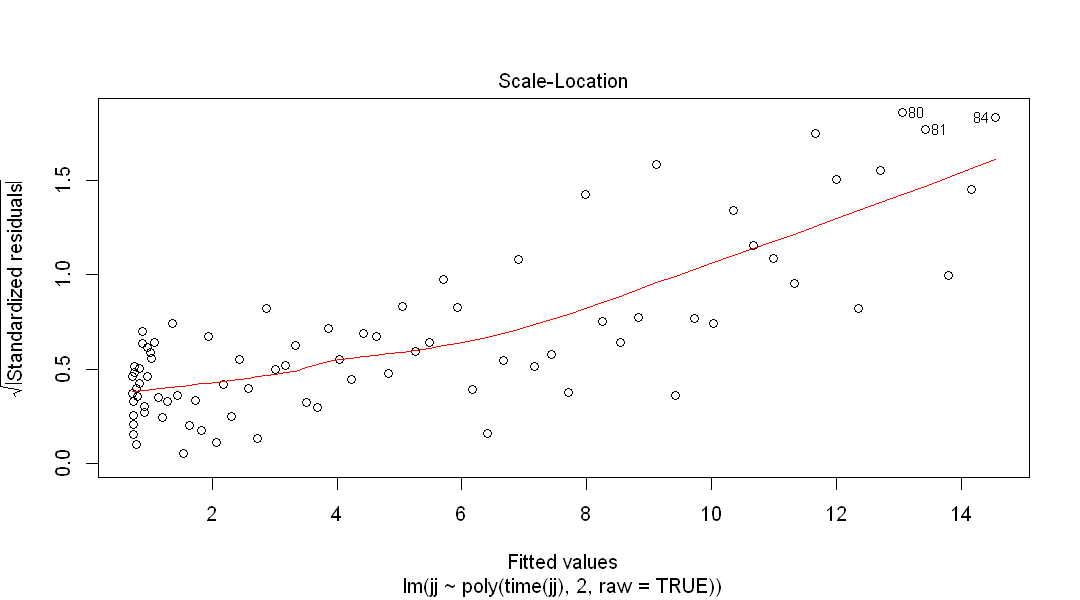

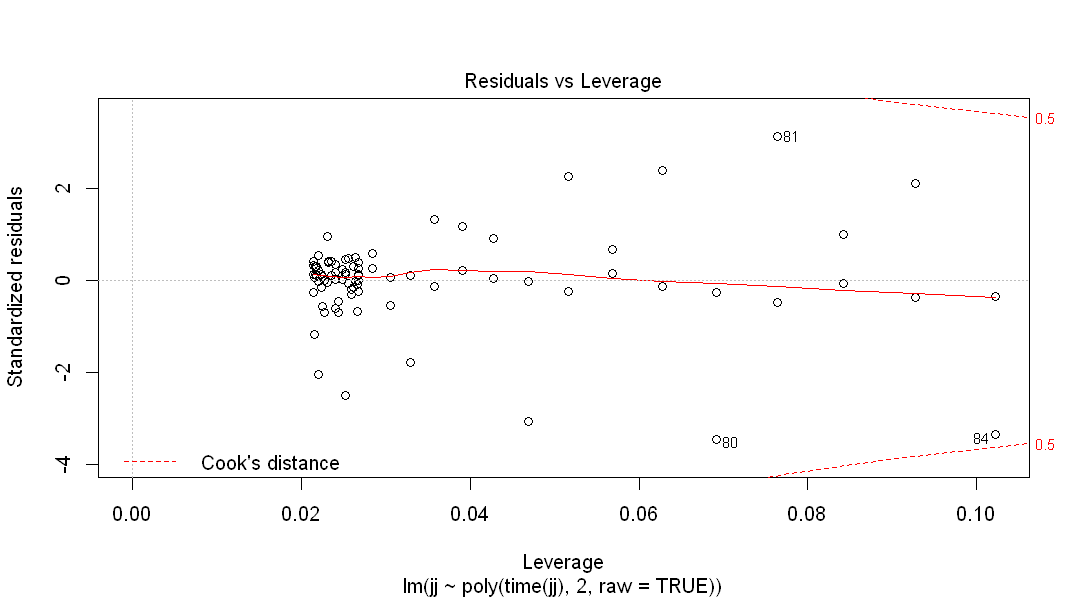

In [12]:
plot(jj.poly2.model)

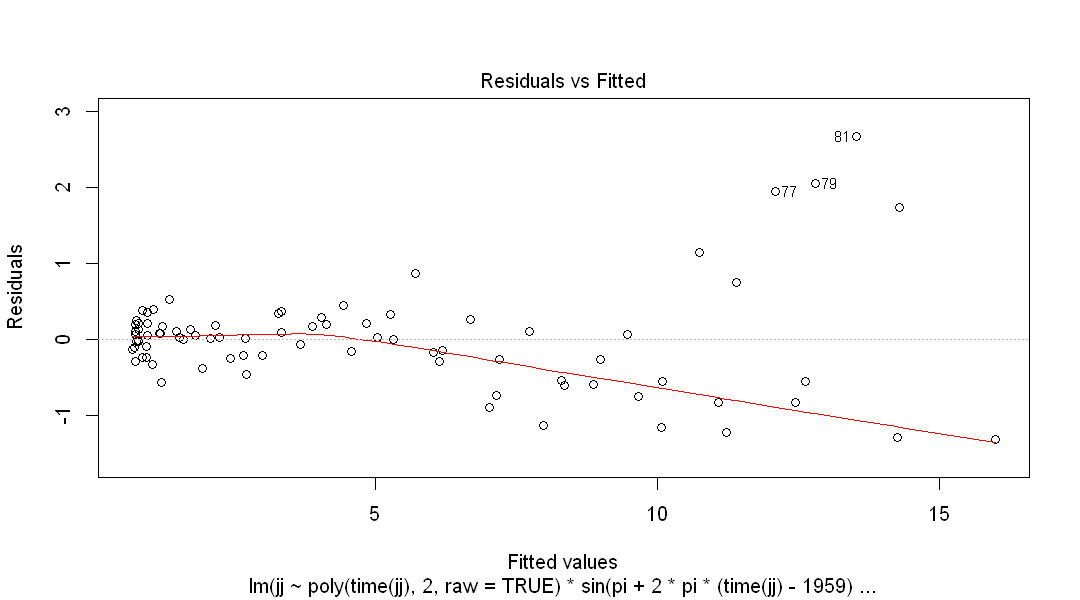

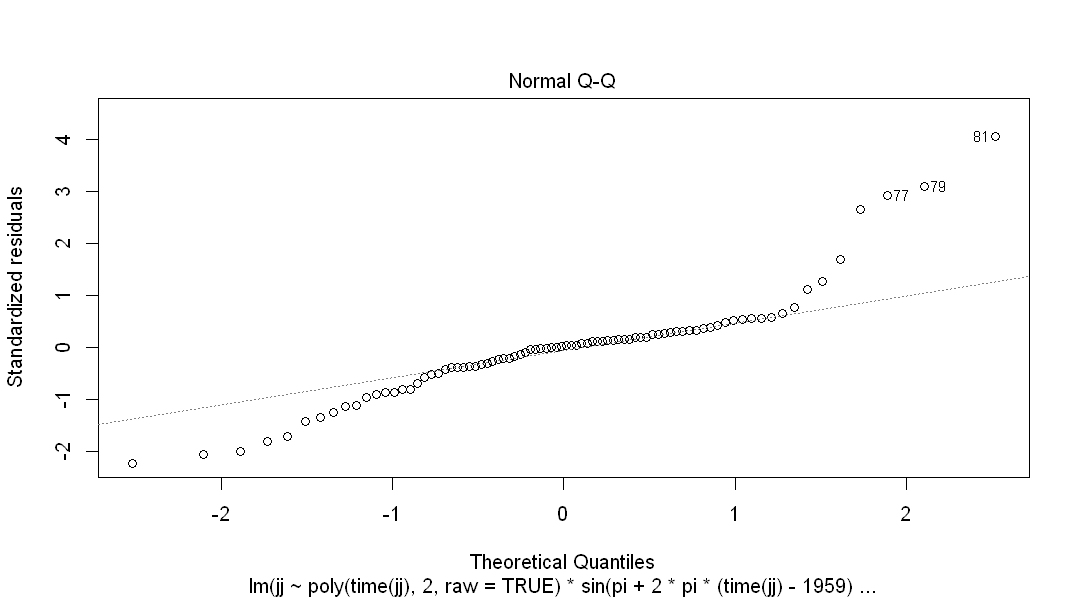

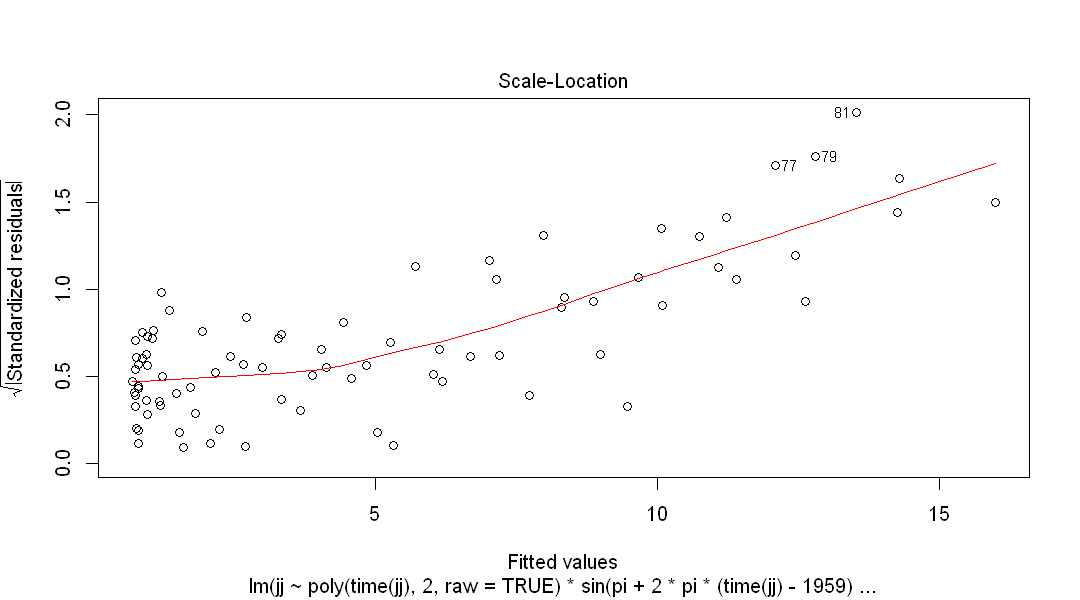

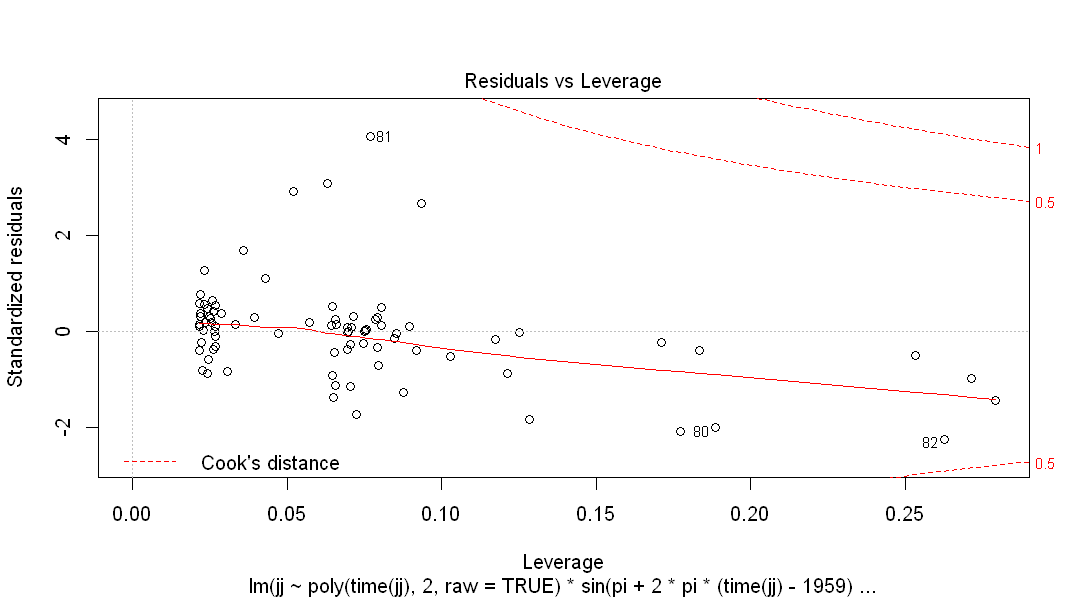

In [13]:
plot(jj.sinos.model)


[Go To Index Section](#Time-Plots)

## 2. Monthly Pneumonia and Influenza Deaths in the U.S.

In [22]:
help(flu)

In [19]:
class(flu)

[1] "ts"

In [20]:
flu

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1968,0.8113721,0.4458291,0.3415985,0.2774243,0.2484958,0.2525427,0.2466902,0.2452006,0.2279679,0.2610293,0.3177998,0.7298681
1969,0.8192756,0.4376872,0.3834813,0.2919304,0.2556420,0.2369918,0.2495123,0.2280816,0.2335083,0.2679917,0.3030445,0.3594536
1970,0.4932865,0.5692177,0.3593959,0.2741868,0.2424912,0.2241473,0.2280840,0.2283657,0.2282342,0.2579092,0.2909701,0.3113483
1971,0.3743171,0.3746391,0.3398281,0.2909505,0.2403667,0.2269297,0.2134564,0.2074597,0.2099793,0.2464345,0.2768291,0.3359459
1972,0.6381312,0.5195216,0.2968231,0.2514277,0.2144966,0.1964111,0.2343862,0.2095384,0.2177600,0.2450697,0.2554203,0.3357194
1973,0.5968794,0.5156948,0.3085772,0.2569596,0.2194814,0.2158074,0.2240929,0.2217431,0.2388084,0.2528328,0.2605210,0.2822165
1974,0.3096678,0.3330646,0.3497020,0.3066515,0.2238370,0.2030033,0.2231299,0.1891271,0.1997522,0.2269953,0.2295186,0.3198083
1975,0.4937200,0.4728154,0.3094317,0.2343683,0.2007220,0.1906996,0.1877136,0.1990874,0.1908602,0.2111834,0.2084524,0.2510464
1976,0.2902977,0.5702096,0.6384278,0.3135166,0.2047724,0.1885323,0.1798065,0.1867087,0.1871117,0.2157304,0.2385934,0.2572363
1977,0.2817310,0.3030367,0.2915253,0.2453148,0.2051037,0.1845583,0.2046436,0.1828399,0.1960763,0.2203844,0.2249940,0.3036654


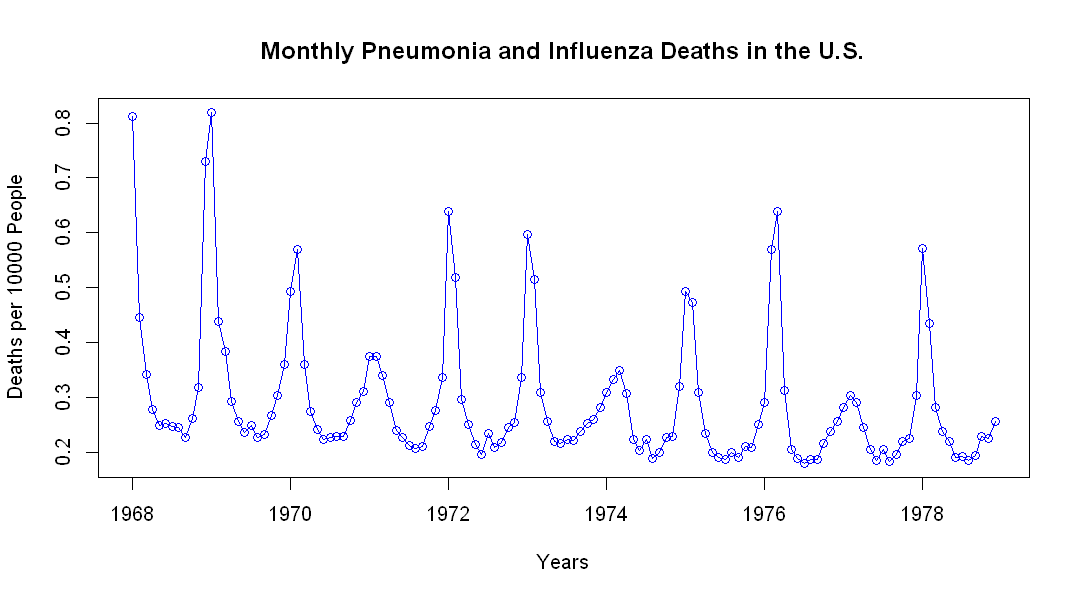

In [25]:
options(repr.plot.width=9, repr.plot.height=5)
plot(flu, type = "o", 
     col="blue", 
     main="Monthly Pneumonia and Influenza Deaths in the U.S.",
     xlab="Years", 
     ylab="Deaths per 10000 People")

This plots suggests there is some sesonality in the data.

In [165]:
sin(45)^2

[1] 0.7240368

In [180]:
flu.linear.model <- lm(flu ~ time(flu))
flu.poly2.model <- lm(flu ~ poly(time(flu), 2, raw=TRUE))
flu.sinos.model <- lm(flu ~ time(flu) * abs(sin(2*pi*(time(flu))/2)))

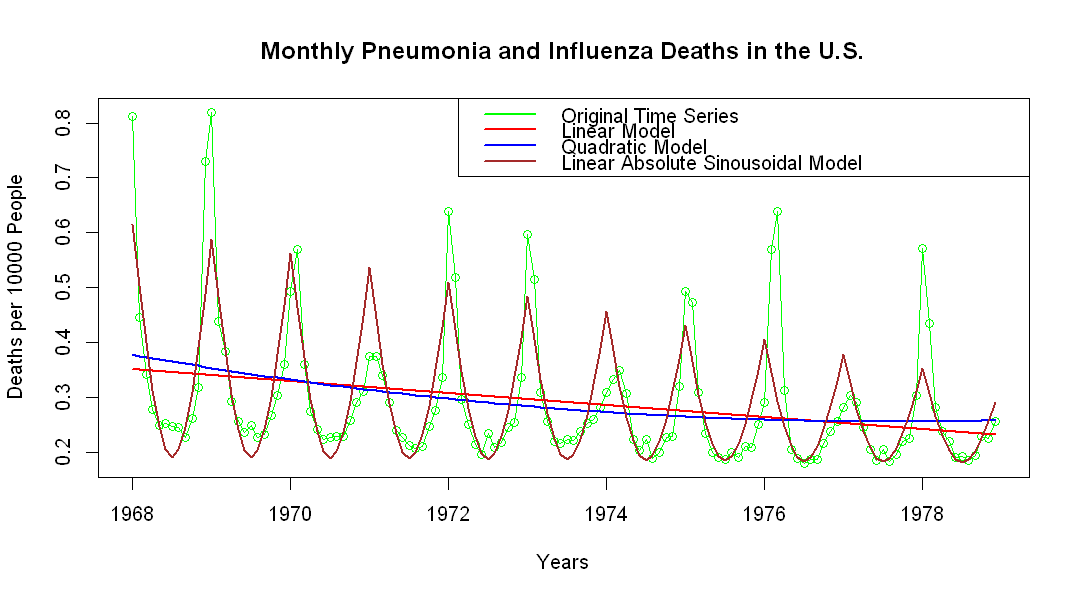

In [181]:
plot(flu, type = "o", 
     col="green", 
     main="Monthly Pneumonia and Influenza Deaths in the U.S.",
     xlab="Years", 
     ylab="Deaths per 10000 People")

lines(x = as.vector(time(flu)), y = predict(flu.linear.model), col = 'red', lwd = 1.7)
lines(x = as.vector(time(flu)), y = predict(flu.poly2.model), col = 'blue', lwd = 1.7)
lines(x = as.vector(time(flu)), y = predict(flu.sinos.model), col = 'brown', lwd = 1.7)

legend(x = "topright", 
       legend=c("Original Time Series", "Linear Model", "Quadratic Model", "Linear Absolute Sinousoidal Model"), 
       col=c("green", "red", "blue", "brown"), 
       lwd=2, 
       text.font=0.2)

In [182]:
summary(flu.linear.model)


Call:
lm(formula = flu ~ time(flu))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11652 -0.07402 -0.04307  0.02754  0.47845 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 21.96732    6.55146   3.353  0.00105 **
time(flu)   -0.01098    0.00332  -3.308  0.00121 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1211 on 130 degrees of freedom
Multiple R-squared:  0.07766,	Adjusted R-squared:  0.07057 
F-statistic: 10.95 on 1 and 130 DF,  p-value: 0.001214


In [183]:
summary(flu.poly2.model)


Call:
lm(formula = flu ~ poly(time(flu), 2, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13348 -0.07000 -0.03968  0.03057  0.46555 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)
(Intercept)                      5.151e+03  4.548e+03   1.133    0.259
poly(time(flu), 2, raw = TRUE)1 -5.209e+00  4.609e+00  -1.130    0.261
poly(time(flu), 2, raw = TRUE)2  1.317e-03  1.168e-03   1.128    0.262

Residual standard error: 0.121 on 129 degrees of freedom
Multiple R-squared:  0.08667,	Adjusted R-squared:  0.07251 
F-statistic:  6.12 on 2 and 129 DF,  p-value: 0.002888


In [184]:
summary(flu.sinos.model)


Call:
lm(formula = flu ~ time(flu) * abs(sin(2 * pi * (time(flu))/2)))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16170 -0.03497 -0.00604  0.01997  0.34604 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 52.201746   9.162546   5.697
time(flu)                                   -0.026213   0.004643  -5.645
abs(sin(2 * pi * (time(flu))/2))           -50.262940  12.985874  -3.871
time(flu):abs(sin(2 * pi * (time(flu))/2))   0.025325   0.006581   3.848
                                           Pr(>|t|)    
(Intercept)                                7.95e-08 ***
time(flu)                                  1.01e-07 ***
abs(sin(2 * pi * (time(flu))/2))           0.000172 ***
time(flu):abs(sin(2 * pi * (time(flu))/2)) 0.000187 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07572 on 128 degrees of freedom
Multiple R-squared:  0.645,	Adjusted 

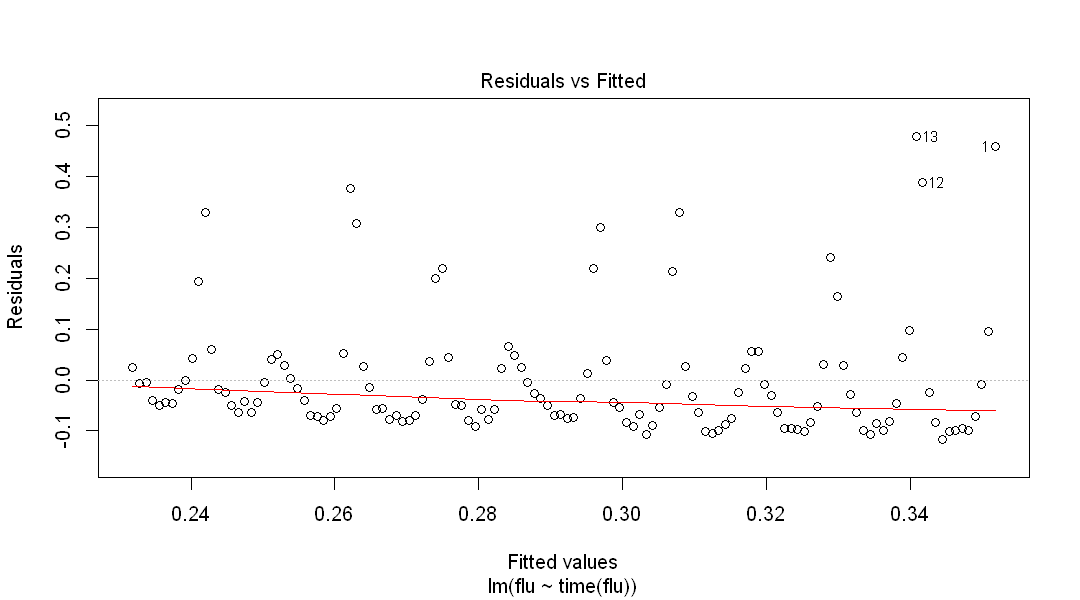

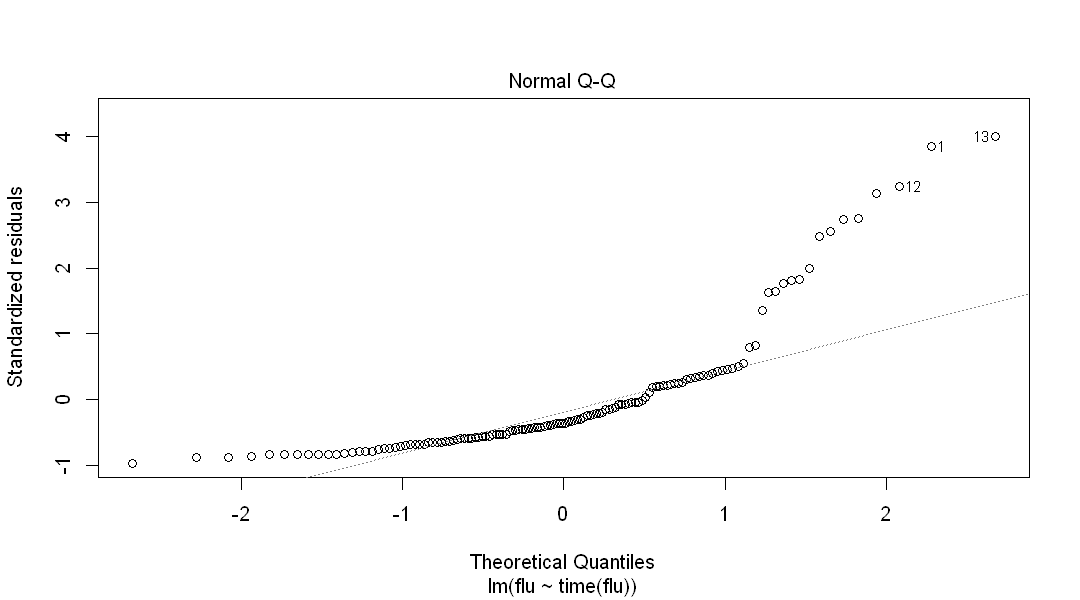

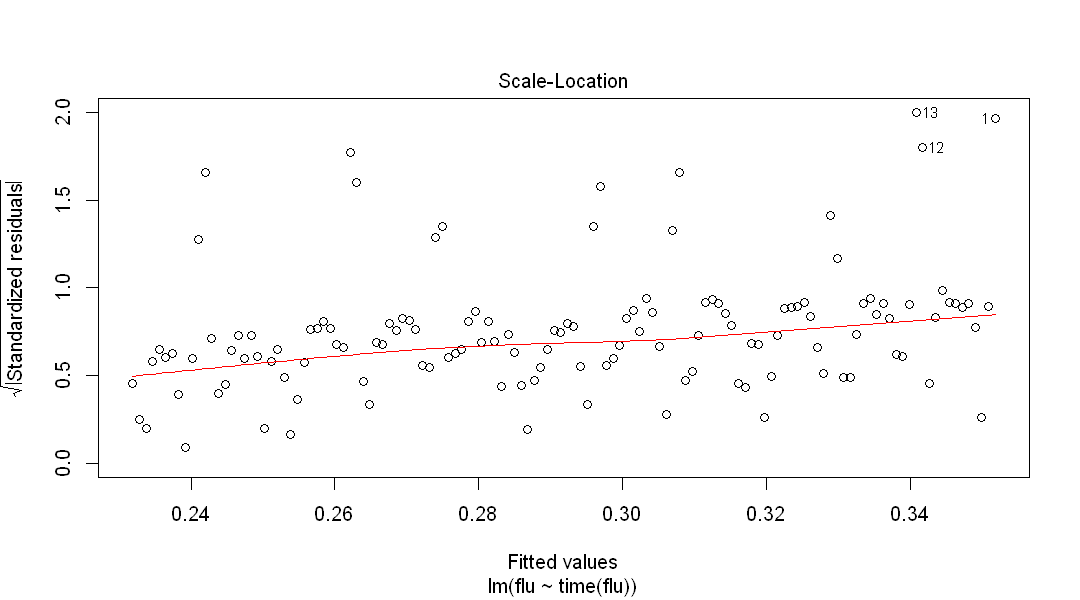

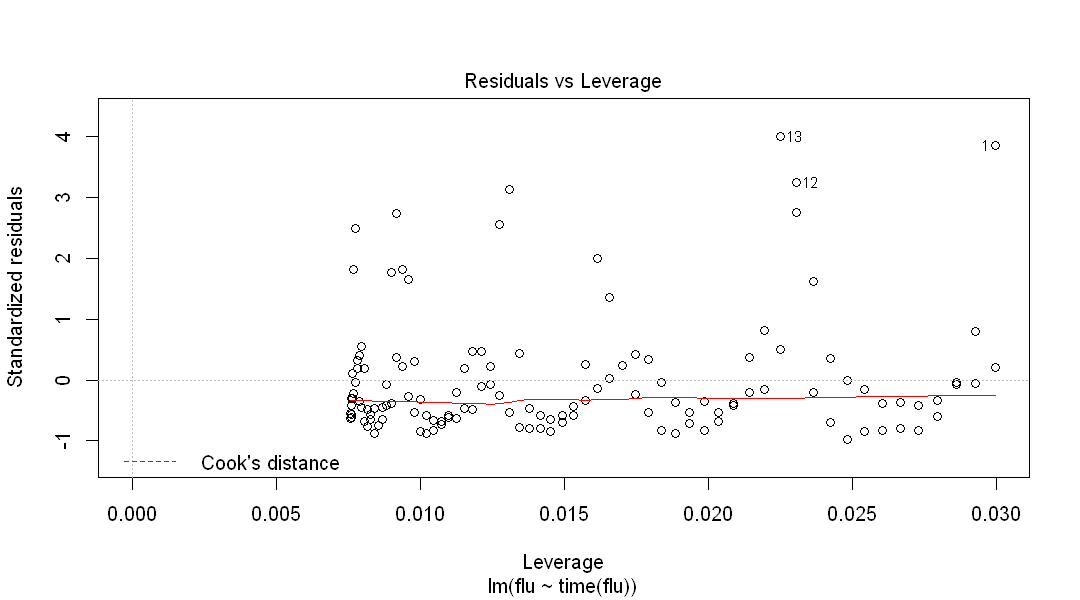

In [185]:
plot(flu.linear.model)

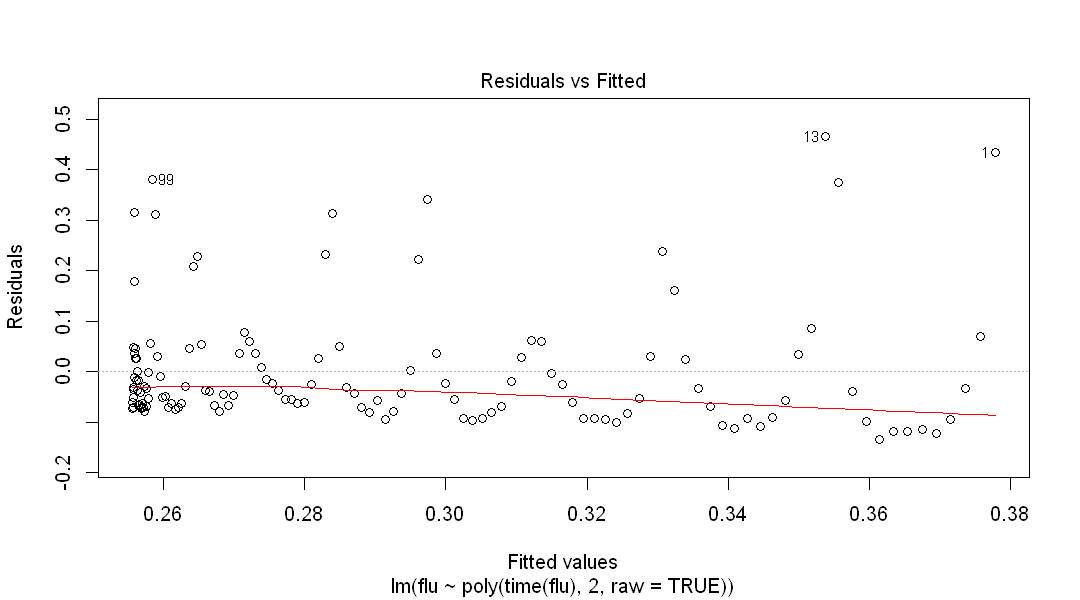

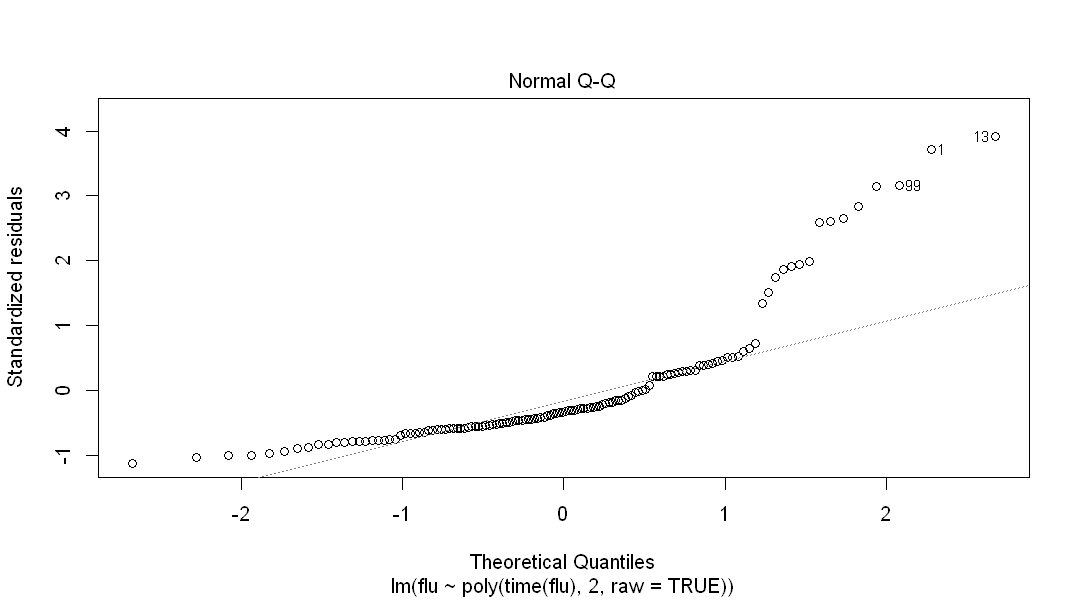

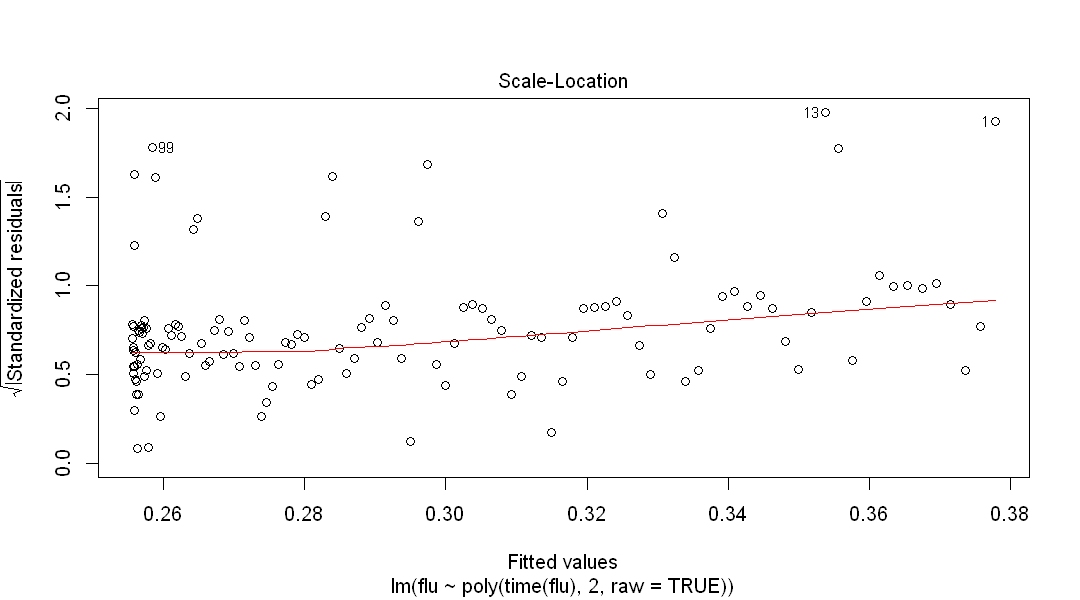

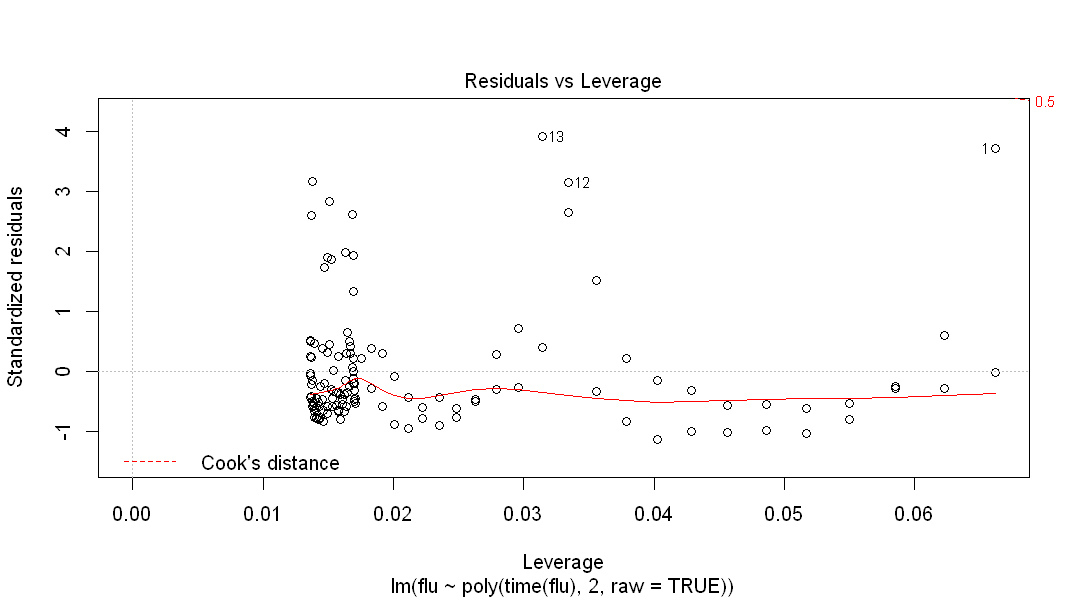

In [186]:
plot(flu.poly2.model)

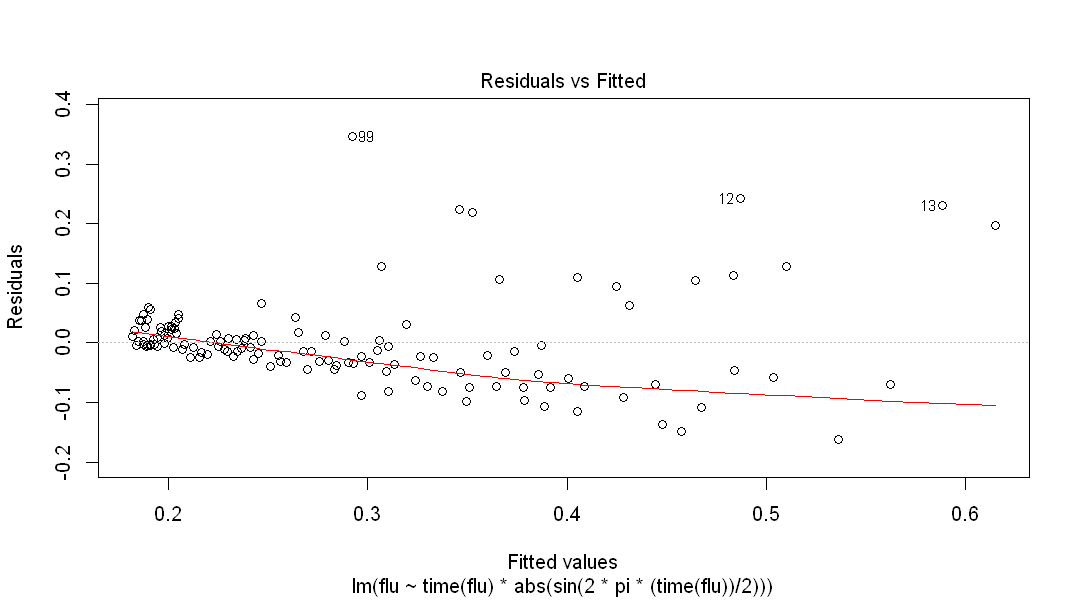

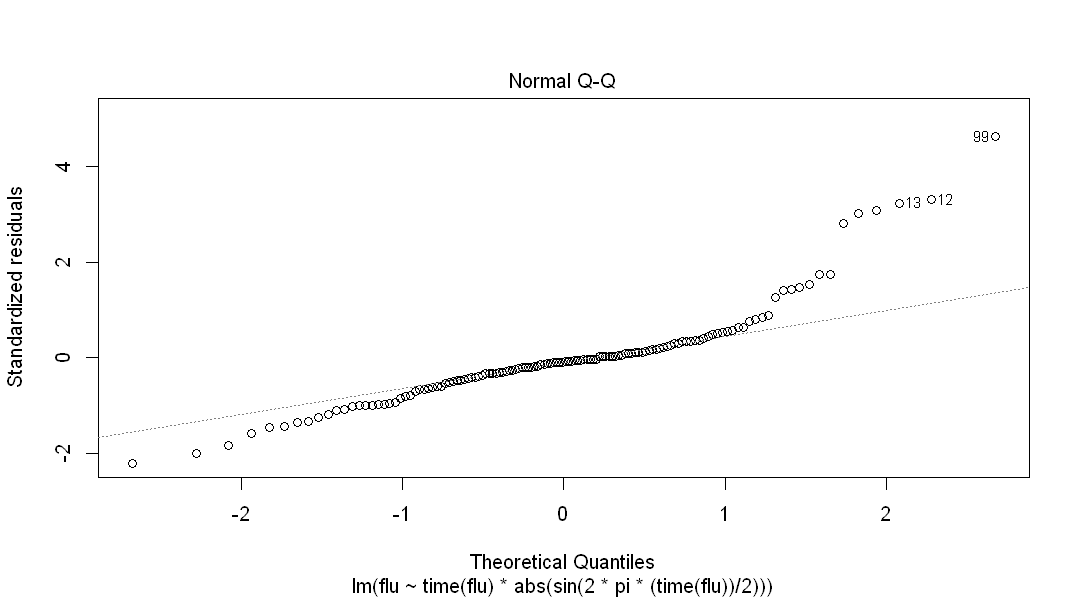

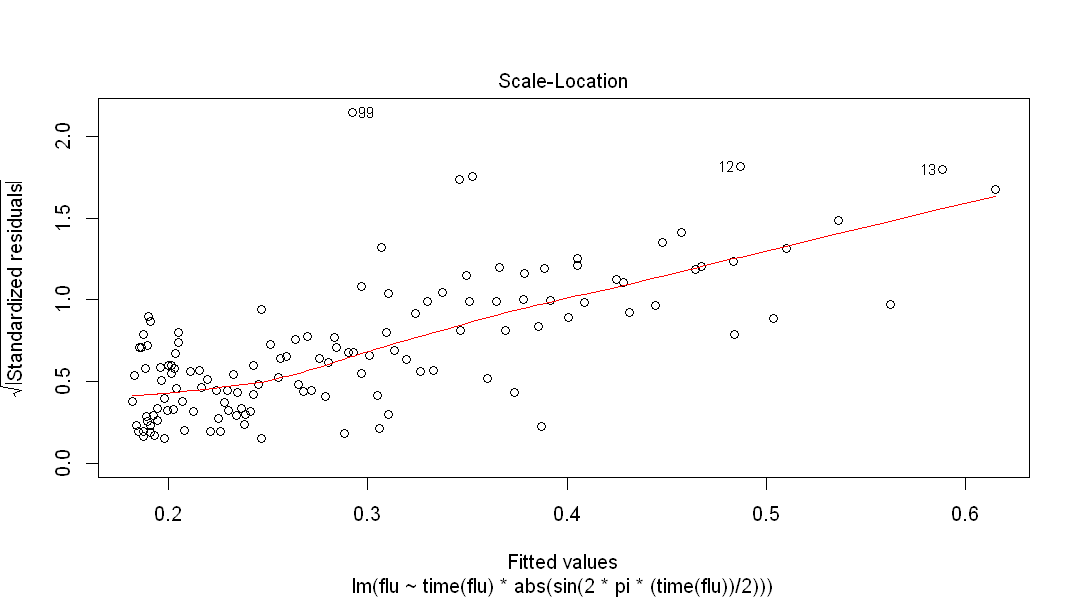

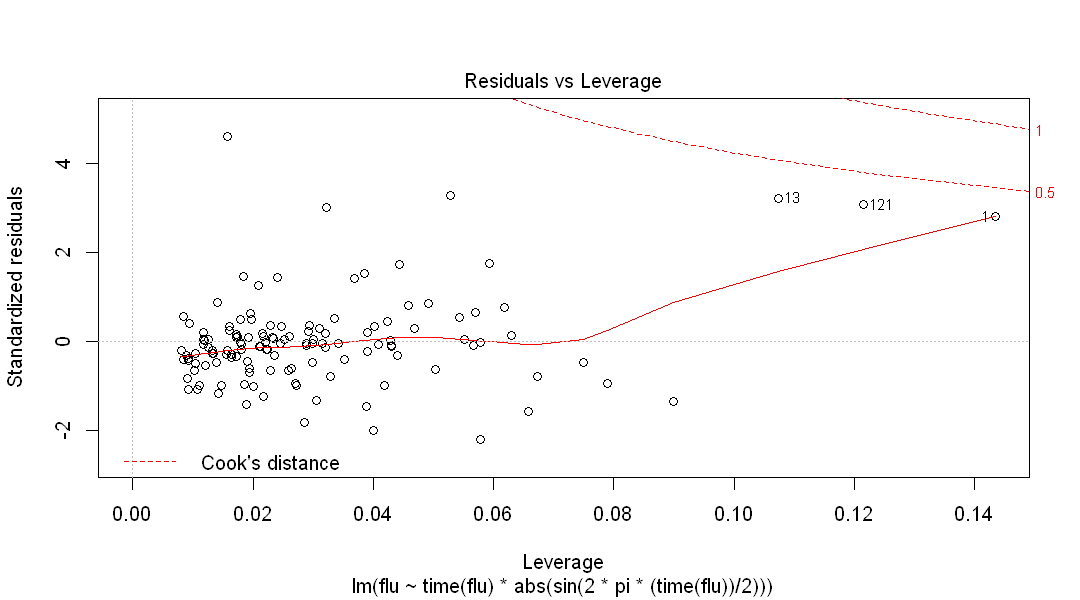

In [187]:
plot(flu.sinos.model)


[Go To Index Section](#Time-Plots)